<a href="https://colab.research.google.com/github/Shwetha1010/-Top-Spotify-Songs-by-Country/blob/main/Top_Spotify_Songs_by_Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('spotify_history.csv')
df.head(5)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [ ]:
df.tail()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True
149859,6iGU74CwXuT4XVepjc9Emf,2024-12-15 23:06:25,android,1893,God Only Knows - Mono,The Beach Boys,Pet Sounds,fwdbtn,fwdbtn,True,True


In [ ]:
df.describe()

,ms_played
count,1.498600e+05
mean,1.283166e+05
std,1.178401e+05
min,0.000000e+00
25%,2.795000e+03
50%,1.388400e+05
75%,2.185070e+05
max,1.561125e+06


In [ ]:
df.shape

(149860, 11)

In [ ]:
df.dtypes

,0
spotify_track_uri,object
ts,object
platform,object
ms_played,int64
track_name,object
artist_name,object
album_name,object
reason_start,object
reason_end,object
shuffle,bool


In [ ]:
df.nunique()

,0
spotify_track_uri,16527
ts,140422
platform,6
ms_played,43082
track_name,13839
artist_name,4113
album_name,7948
reason_start,13
reason_end,15
shuffle,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [ ]:
df.isnull().sum()

,0
spotify_track_uri,0
ts,0
platform,0
ms_played,0
track_name,0
artist_name,0
album_name,0
reason_start,143
reason_end,117
shuffle,0


In [ ]:
df.columns

Index(['spotify_track_uri', 'ts', 'platform', 'ms_played', 'track_name',
       'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle',
       'skipped'],
      dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(1185)

## DATA VISUALIZATIONS

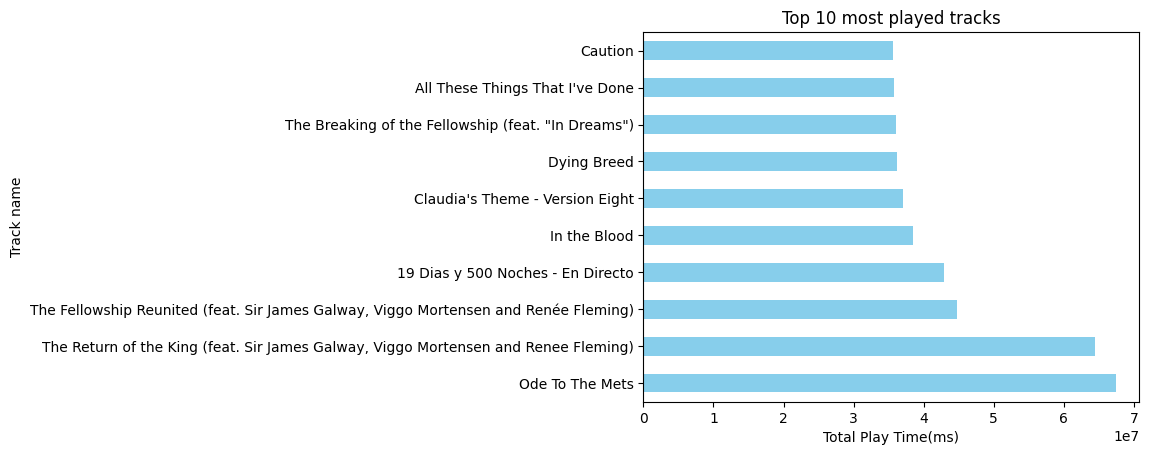

In [ ]:
top_tracks=df.groupby('track_name')['ms_played'].sum().sort_values(ascending=False).head(10)
top_tracks.plot(kind='barh',color='skyblue')
plt.xlabel('Total Play Time(ms)')
plt.ylabel('Track name')
plt.title('Top 10 most played tracks')
plt.show()

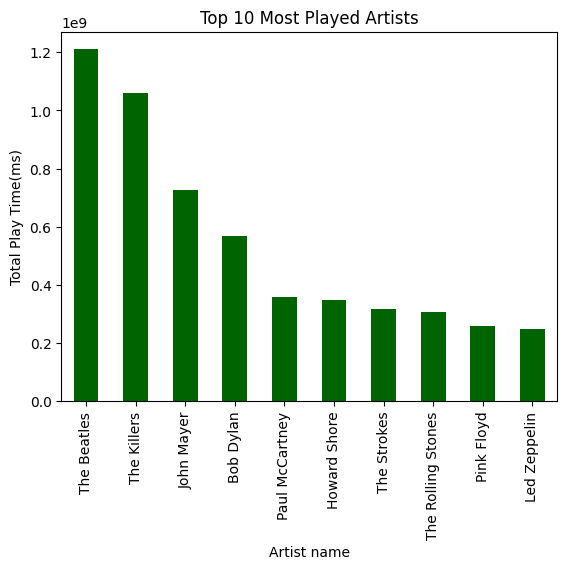

In [ ]:
top_artists=df.groupby('artist_name')['ms_played'].sum().sort_values(ascending=False).head(10)
top_artists.plot(kind='bar',color='darkgreen')
plt.ylabel('Total Play Time(ms)')
plt.xlabel('Artist name')
plt.title('Top 10 Most Played Artists')
plt.xticks(rotation=90)
plt.show()

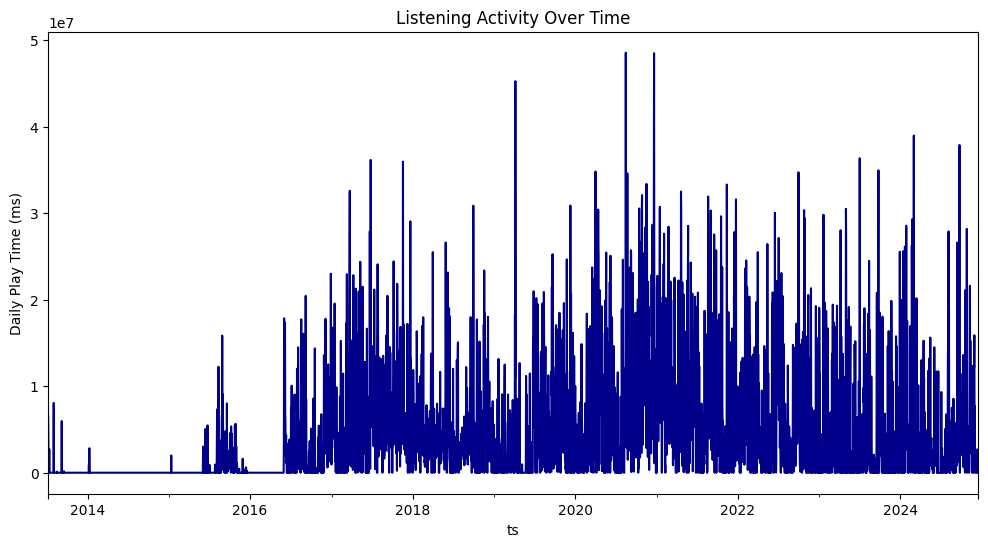

In [ ]:
df['ts'] = pd.to_datetime(df['ts'])
df.set_index('ts', inplace=True)

daily_listening = df['ms_played'].resample('D').sum()

daily_listening.plot(figsize=(12,6), color='darkblue')
plt.ylabel('Daily Play Time (ms)')
plt.title('Listening Activity Over Time')
plt.show()

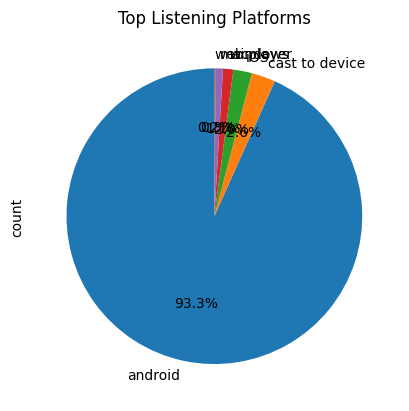

In [ ]:
top_platforms=df['platform'].value_counts()
top_platforms.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Top Listening Platforms')

plt.show()

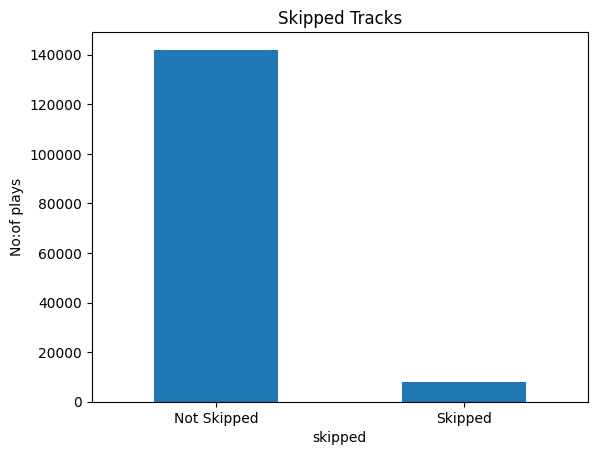

In [ ]:
skipped_counts=df['skipped'].value_counts()
skipped_counts.plot(kind='bar')
plt.xticks([0,1],['Not Skipped','Skipped'],rotation=0)
plt.ylabel('No:of plays')
plt.title('Skipped Tracks')
plt.show()

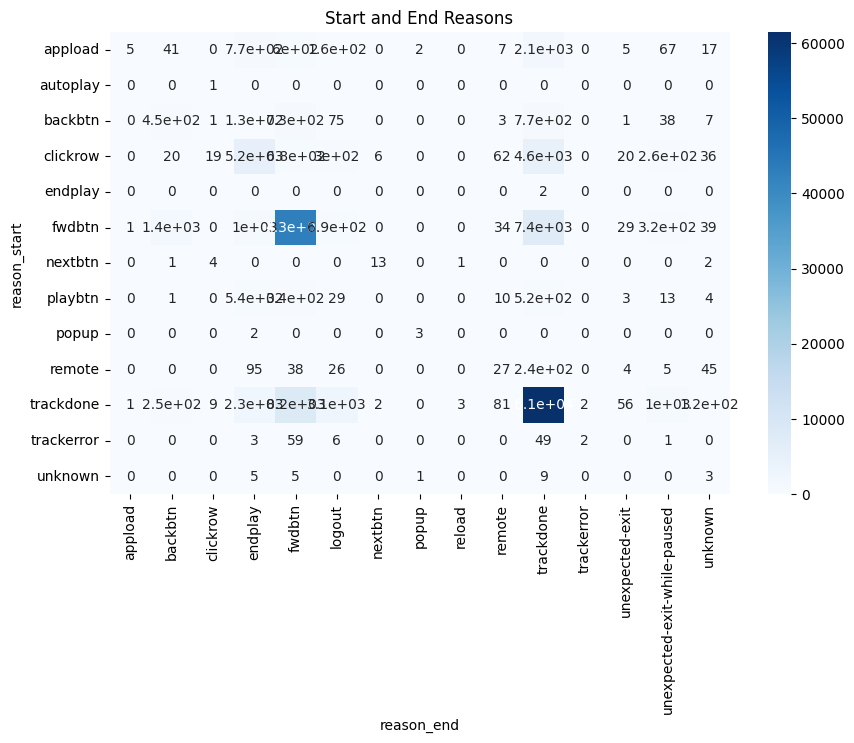

In [ ]:
start_end=pd.crosstab(df['reason_start'],df['reason_end'])
plt.figure(figsize=(10,6))
sns.heatmap(start_end,annot=True,cmap='Blues')
plt.title('Start and End Reasons')
plt.show()

## PREDICTIVE MODELING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
drop_cols=['spotify_track_uri','ts','track_name','artist_name','album_name']
df.drop(columns=[col for col in drop_cols if col in df.columns],inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
le=LabelEncoder()
for col in ['platform','reason_start','reason_end']:
  if col in df.columns:
    df[col]=le.fit_transform(df[col])

In [ ]:
x=df.drop('skipped',axis=1)
y=df['skipped']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
models={
    'logistic_regression':LogisticRegression(max_iter=100),
    'decision_tree':DecisionTreeClassifier(),
    'random_forest':RandomForestClassifier(),
    'naive_bayes':GaussianNB(),
    'svm':SVC(),
    'knn':KNeighborsClassifier()
}

In [ ]:
print("Model accuracy:")
for name,model in models.items():
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  print(f"{name}:{acc}")

Model accuracy:
logistic_regression:0.9477447377213498
decision_tree:0.9346809221516873
random_forest:0.9345138656866021
naive_bayes:0.9477781490143669
svm:0.9477781490143669
knn:0.9497160040093552


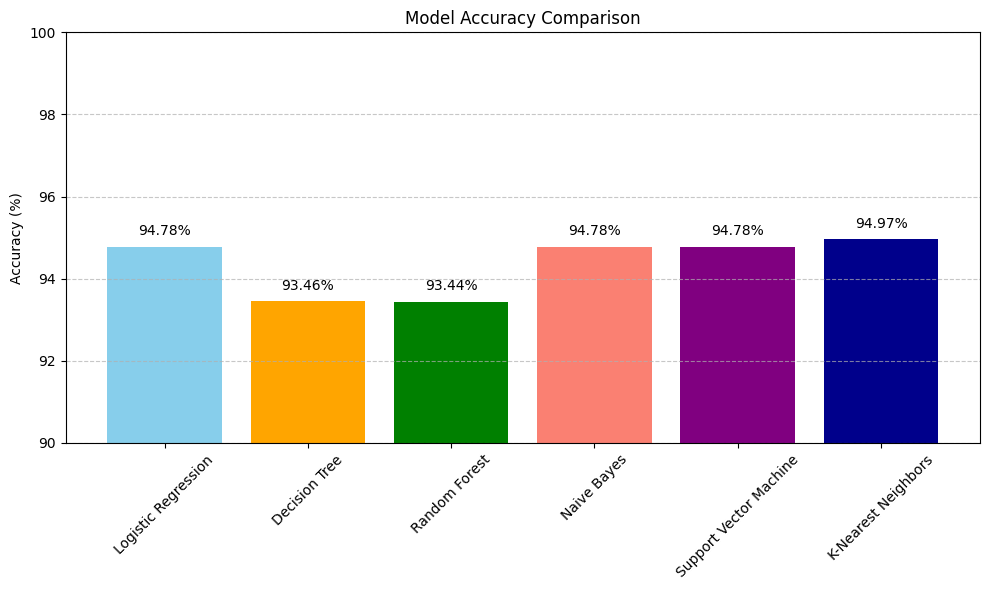

In [ ]:
# Accuracy values
accuracies = {
    'Logistic Regression': 94.78,
    'Decision Tree': 93.46,
    'Random Forest': 93.44,
    'Naive Bayes': 94.78,
    'Support Vector Machine': 94.78,
    'K-Nearest Neighbors': 94.97
}
plt.figure(figsize=(10,6))
plt.bar(accuracies.keys(),accuracies.values(),color=['skyblue', 'orange', 'green', 'salmon', 'purple', 'darkblue'])

plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(90, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, (model, acc) in enumerate(accuracies.items()):
    plt.text(i, acc + 0.2, f"{acc:.2f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()